# Linear regression using robust functions
### By Qijun Jin and Johnny

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

# 1. Introduction

###### 1.1 Implement the proposed method using gradient descent with backtracking (or a small constant α value). You may check your method with a randomly generated set of points

In [ ]:
m = [0.,0.]
angle = 45*math.pi/180
rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle), math.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
p = np.random.multivariate_normal(m,s,100)

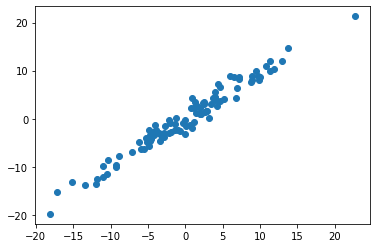

In [ ]:
plt.scatter(p[:,0], p[:,1])

In [ ]:
def error(w0, w1, p):
    e = 0
    for i in p:
        yhat = w0*i[0] + w1
        e += (yhat - i[1])**2
    return 0.5*e

In [ ]:
def gradient_descent(w0, w1, p):
    grad_w0 = 0
    grad_w1 = 0
    for i in p:
        error = (w0*i[0] + w1) - i[1]
        grad_w0 += error * i[0]
        grad_w1 += error
    return np.asarray([grad_w0, grad_w1])

In [ ]:
def gradient_descent_back(w0, w1, p, eps = 1e-6, verbose = False):
    g = gradient_descent(w0, w1, p)
    e = error(w0, w1, p)
    norm = np.linalg.norm(g)
    while (norm > 1e-10):
        alpha = 1.0
        w0_n = w0 - alpha * g[0]
        w1_n = w1 - alpha * g[1]
        e_n = error(w0_n, w1_n, p)
        while ((e_n >= e) and (alpha >= eps)):
            alpha = alpha * 0.8
            w0_n = w0 - alpha * g[0]
            w1_n = w1 - alpha * g[1]
            e_n = error(w0_n, w1_n, p)
        if (alpha < eps):
            print("Alpha value to low: " + repr(alpha))
            norm = 0
        else:
            w0 = w0_n
            w1 = w1_n
            e = e_n
            g = gradient_descent(w0, w1, p)
            norm = np.linalg.norm(g)
        if(verbose):
            print("w0 = " + repr(w0) + " w1 = " + repr(w1) + " error = " + repr(e) + " norm = " + repr(norm))

    return w0, w1

w0 = 1.600336054177842 w1 = 0.003834117969760137 error = 1088.2595762167296 norm = 3170.611234765689
w0 = 0.5714152897012985 w1 = 0.002132146245945796 error = 505.837539899306 norm = 2038.5112590040508
w0 = 1.232947476619752 w1 = 0.003964785221111685 error = 265.0807573038744 norm = 1310.6396543891876
w0 = 0.8076208445499358 w1 = 0.0035009272114649784 error = 165.55854456706967 norm = 842.6624644805883
w0 = 1.081078658614895 w1 = 0.004490398568434727 error = 124.4186440626493 norm = 541.7817208248707
w0 = 0.9052604412042637 w1 = 0.004523040088422765 error = 107.41232399116133 norm = 348.33398515560344
w0 = 1.018299548209289 w1 = 0.005149165814356627 error = 100.38214654069454 norm = 223.9593315177389
w0 = 0.9456209336896748 w1 = 0.005372721740616957 error = 97.47583467293798 norm = 143.9947256367801
w0 = 0.9923476091911876 w1 = 0.005834791459613346 error = 96.27422503135257 norm = 92.58343920864877
w0 = 0.9623039559905893 w1 = 0.006123856136695417 error = 95.77730437364511 norm = 59.53

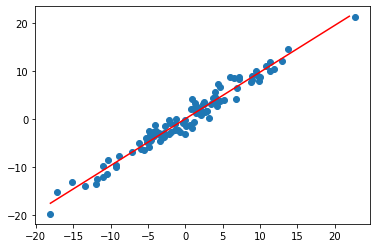

In [ ]:
x = np.arange(np.min(p[:,0]), np.max(p[:,0])) # range
w0, w1 = gradient_descent_back(0, 0, p, verbose = True) 

plt.scatter(p[:,0], p[:,1])
plt.plot(x, w0*x + w1, 'r')

###### 1.2 Let us now check the sensitivity of the method to outliers, that is, points that do not follow the model. Using a set of points generate with an angle of 45 degrees, change the value of one point to a value “far away” from the set of points, for instance c[1] = [-40,20]. Draw the line that approximates the set of points and observe that one point may have a large influence in the obtained solution.

w0 = 0.967696192723887 w1 = -0.004282509246941721 error = 1811.7516833036025 norm = 2367.834933564267
w0 = 0.3530034871934312 w1 = 0.002027751909486418 error = 1546.268786902398 norm = 1504.1501391687875
w0 = 0.743502854184735 w1 = 0.0015161523974103093 error = 1439.129579444031 norm = 955.5114780741662
w0 = 0.4954659569631733 w1 = 0.0052475241401213095 error = 1395.886766789138 norm = 607.0050166265563
w0 = 0.6530506181960102 w1 = 0.006195415153633945 error = 1378.4283254809875 norm = 385.63464666525164
w0 = 0.5529686943728718 w1 = 0.008825573943005625 error = 1371.3750150412927 norm = 245.0327824308702
w0 = 0.616565673304458 w1 = 0.01030341370720832 error = 1368.5208794338942 norm = 155.74838202132526
w0 = 0.5761871338207594 w1 = 0.012431736498512536 error = 1367.3616283144313 norm = 99.07804520927753
w0 = 0.601857203701791 w1 = 0.014067445188213998 error = 1366.8866931201985 norm = 63.147966104742046
w0 = 0.5855702024029813 w1 = 0.015938733517150652 error = 1366.6882628578805 norm =

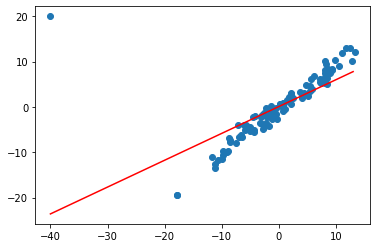

In [ ]:
m = [0.,0.]
angle = 45*math.pi/180
rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle), math.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
p = np.random.multivariate_normal(m, s, 100)

p[1] = [-40,20]
x = np.arange(np.min(p[:,0]), np.max(p[:,0])) # range
w0, w1 = gradient_descent_back(0, 0, p, verbose = True) 

plt.scatter(p[:,0], p[:,1])
plt.plot(x, w0*x + w1, 'r')

Alpha value to low: 9.807971461541723e-07


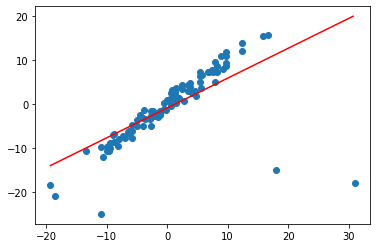

In [ ]:
m = [0.,0.]
angle = 45*math.pi/180
rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle), math.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
p = np.random.multivariate_normal(m, s, 100)

p[10] = [np.random.randint(-40, 40), np.random.randint(-40, 40)]
p[40] = [np.random.randint(-40, 40), np.random.randint(-40, 40)]
p[90] = [np.random.randint(-40, 40), np.random.randint(-40, 40)]

x = np.arange(np.min(p[:,0]), np.max(p[:,0])) # range
w0, w1 = gradient_descent_back(0, 0, p) 

plt.scatter(p[:,0], p[:,1])
plt.plot(x, w0*x + w1, 'r')

### Outliers have a huge impact on the result of data analysis and various statistical measures.

* ###### If the outliers are non-randomly distributed, they can decrease normality.
* ###### It increases the error variance and reduces the power of statistical tests.
* ###### They can cause bias and/or influence estimates.
* ###### They can also impact the basic assumption of regression as well as other statistical models.

# 2. Robust functions

###### Assume, for simplicity, that c = 1 is taken for the Cauchy function (you may use the set of points with a 45 degrees)

###### 1. Plot the least squares function

Alpha value to low: 9.807971461541723e-07


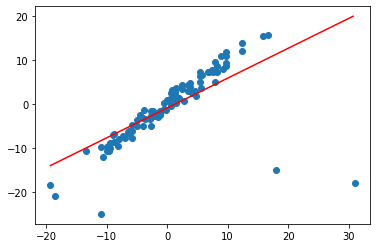

In [ ]:
x = np.arange(np.min(p[:,0]), np.max(p[:,0])) # range
w0, w1 = gradient_descent_back(0, 0, p) 

plt.scatter(p[:,0], p[:,1])
plt.plot(x, w0*x + w1, 'r')

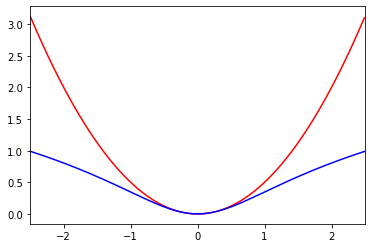

In [ ]:
x = np.arange(-2.5 , 2.5, 0.01)
plt.xlim(-2.5, 2.5)

lse = lambda u: 1/2*(u**2)
plt.plot(x, lse(x), 'r')

def cauchy(c = 1, color = 'b'):
  cauchy = lambda u: c**2/2*np.log(1+(u/c)**2)
  plt.plot(x, cauchy(x), color)

cauchy(c = 1)

The red curve corresponds to the least square error function and the blue line corresponds to the Cauchy function with c = 1. When the data is far from the central range of the function, with the least square error function, it takes more into account the outliers. Conversely, with the Cauchy function, it takes less into account those points.

###### 2. Implement the algorithm that allows to compute the parameters w0 and w1 using the Cauchy function.

In [ ]:
def error_cauchy(w0, w1, p, c = 1):
    e = 0
    for i in p:
        e += (((w0*i[0] + w1) - i[1])/c)**2
    return (c**2/2)* np.log(1 + e)

In [ ]:
def gradient_descent_cauchy(w0, w1, p, c = 1):
    grad_w0 = 0
    grad_w1 = 0
    for i in p:
        error = (w0*i[0] + w1) - i[1]
        de = np.log(math.e) * (1+(error/c)**2)

        grad_w0 += 2 * error / de * i[0]
        grad_w1 += 2 * error / de

    return np.asarray([grad_w0, grad_w1])

In [ ]:
def gradient_descent_back_cauchy(w0, w1, p, c = 1, eps = 1e-6, verbose = False):
    g = gradient_descent_cauchy(w0, w1, p, c)
    e = error_cauchy(w0, w1, p, c)
    norm = np.linalg.norm(g)
    while (norm > 1e-10):
        alpha = 1.0
        w0_n = w0 - alpha * g[0]
        w1_n = w1 - alpha * g[1]
        e_n = error_cauchy(w0_n, w1_n, p, c)
        while ((e_n >= e) and (alpha >= eps)):
            alpha = alpha * 0.8
            w0_n = w0 - alpha * g[0]
            w1_n = w1 - alpha * g[1]
            e_n = error_cauchy(w0_n, w1_n, p, c)
        if (alpha < eps):
            print("Alpha value to low: " + repr(alpha))
            norm = 0
        else:
            w0 = w0_n
            w1 = w1_n
            e = e_n
            g = gradient_descent_cauchy(w0, w1, p, c)
            norm = np.linalg.norm(g)
        if(verbose):
            print("w0 = " + repr(w0) + " w1 = " + repr(w1) + " error = " + repr(e) + " norm = " + repr(norm))
    return w0, w1

###### 3. Compare the results you obtain with the least squares function and the Cauchy function assuming that no outliers are in the dataset.

Alpha value to low: 9.807971461541723e-07


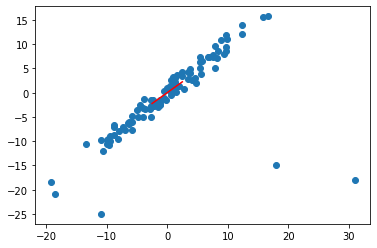

In [ ]:
w0, w1 = gradient_descent_back_cauchy(0, 0, p) 

plt.scatter(p[:,0], p[:,1])
plt.plot(x, w0*x + w1, 'r')

###### We can observe that without outliers 2 functions can approach to similar results.

### 4. Compare now the results with only one outlier. You may proceed as has been proposed before. The Cauchy function should be more robust than the quadratic function.

Alpha value to low: 9.807971461541723e-07


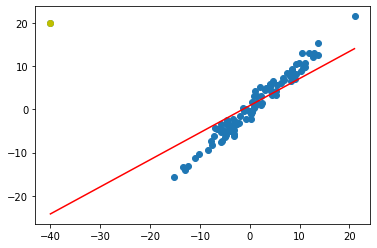

In [ ]:
m = [0.,0.]
angle = 45*math.pi/180
rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle), math.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
p = np.random.multivariate_normal(m, s, 100)

p2 = np.copy(p[1])
p[1] = [-40,20]
x = np.arange(np.min(p[:,0]), np.max(p[:,0])) # range
w0, w1 = gradient_descent_back(0, 0, p) 

plt.scatter(p[:,0], p[:,1])
plt.scatter(p[1][0], p[1][1], color = 'y')
plt.plot(x, w0*x + w1, 'r')

Alpha value to low: 9.807971461541723e-07


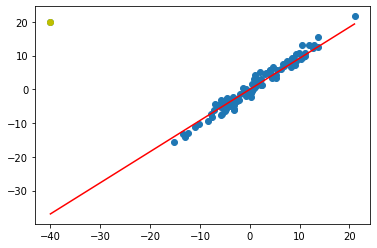

In [ ]:
w0, w1 = gradient_descent_back_cauchy(0, 0, p) 

plt.scatter(p[:,0], p[:,1])
plt.scatter(p[1][0], p[1][1], color = 'y')
plt.plot(x, w0*x + w1, 'r')

###### We can observe that using Cauchy function it does taking less into account this outlier with C = 1.

### 5. Test the influence of the parameter c in the obtained regression. You may, for instance, check the results obtained with c = 1, c = 100, c = 1/100 and c = 1/1000. Can you reason why these results are obtained? To do this, you are recommended to compare the corresponding ρ(u) functions.


### c = 1

w0 = 1.161946721306054 w1 = -0.0010297995900558333 error = 4.2289230201319965 norm = 291.33468237014654
w0 = 0.2817937076917705 w1 = -0.02592586821433175 error = 4.11322968682766 norm = 211.78173935712667
w0 = 0.9218569194586267 w1 = -0.029089892515397522 error = 4.072208912155238 norm = 183.06378624948294
Alpha value to low: 9.807971461541723e-07
w0 = 0.9218569194586267 w1 = -0.029089892515397522 error = 4.072208912155238 norm = 0


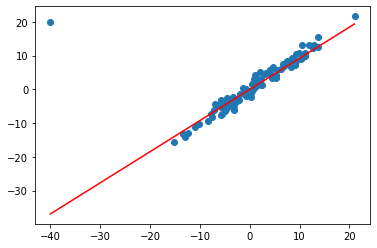

In [ ]:
w0, w1 = gradient_descent_back_cauchy(0, 0, p, verbose = True) 

plt.scatter(p[:,0], p[:,1])
plt.plot(x, w0*x + w1, 'r')

### c = 100

w0 = 1.0962837478347451 w1 = 0.03365579381816435 error = 1782.7662106728828 norm = 4536.065214824328
w0 = 0.342716285542344 w1 = 0.046858406823230905 error = 1486.8704567085658 norm = 4076.6434067259024
w0 = 0.8839495129810545 w1 = 0.07330243216267017 error = 1424.5692071037533 norm = 2209.2534961398655
w0 = 0.42566240875024164 w1 = 0.09590212200019585 error = 1380.6588077014417 norm = 3080.2262610598673
w0 = 0.8344160358743379 w1 = 0.11946647902148536 error = 1367.54141041143 norm = 1662.5161528262101
w0 = 0.48985491266204934 w1 = 0.1419069175377139 error = 1320.5185717741128 norm = 2314.1569292187364
w0 = 0.7353594895361781 w1 = 0.15877492779798136 error = 1291.3526593056067 norm = 555.2307299567933
w0 = 0.5592013112633974 w1 = 0.19664433540917842 error = 1278.4372462454587 norm = 1492.6155688591875
w0 = 0.6856414514708626 w1 = 0.20831586563854035 error = 1269.8011458832118 norm = 116.4282750467728
w0 = 0.6974478175357959 w1 = 0.2811604896832105 error = 1269.707853155182 norm = 162.1

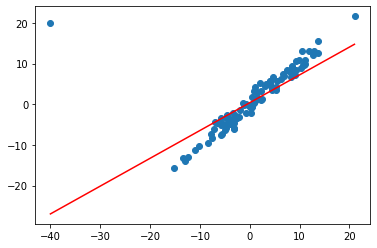

In [ ]:
w0, w1 = gradient_descent_back_cauchy(0, 0, p, c = 100, verbose = True) 

plt.scatter(p[:,0], p[:,1])
plt.plot(x, w0*x + w1, 'r')

### c = 1/100

w0 = 0.016726252531230796 w1 = 0.0008421184872973963 error = 0.0008904250582304585 norm = 0.01738685942037239
w0 = 0.03409799763517574 w1 = 0.0015669305645677075 error = 0.0008891255944089532 norm = 0.018071867842571372
w0 = 0.05215932609853499 w1 = 0.002184037895600352 error = 0.0008877788297786023 norm = 0.018819098979612287
w0 = 0.07097141240140326 w1 = 0.0026977453394637545 error = 0.0008863821426521618 norm = 0.019653128020181525
w0 = 0.09062033640028691 w1 = 0.0031042261677179024 error = 0.0008849316823878835 norm = 0.02061341693771262
w0 = 0.11123183918871984 w1 = 0.0033851365633941733 error = 0.0008834215478314412 norm = 0.0217710279385224
w0 = 0.1330026060501959 w1 = 0.0034917562762958277 error = 0.0008818419701703379 norm = 0.02327732580522599
w0 = 0.1562791317136108 w1 = 0.003298754506802 error = 0.0008801745720897949 norm = 0.02555686659333748
w0 = 0.181821156525824 w1 = 0.0024278936901764425 error = 0.0008783761277993661 norm = 0.030641535688190214
w0 = 0.212285718597188 w

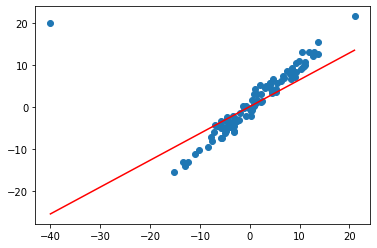

In [ ]:
w0, w1 = gradient_descent_back_cauchy(0, 0, p, c = 1 / 100, verbose = True) 

plt.scatter(p[:,0], p[:,1])
plt.plot(x, w0*x + w1, 'r')

### c = 1/1000

w0 = 0.00016722280245973158 w1 = 8.49165607468432e-06 error = 1.1219249911601666e-05 norm = 0.00016750179226716696
w0 = 0.0003345098677861554 w1 = 1.697034625571778e-05 error = 1.1219124409413695e-05 norm = 0.00016756535021989632
w0 = 0.0005018612282658486 w1 = 2.5436085438580895e-05 error = 1.1218998860833782e-05 norm = 0.00016762894285054055
w0 = 0.0006692769163060673 w1 = 3.388888847721752e-05 error = 1.1218873265848212e-05 norm = 0.00016769257027223348
w0 = 0.0008367569644350426 w1 = 4.2328770183974775e-05 error = 1.1218747624443216e-05 norm = 0.00016775623259843137
w0 = 0.0010043014053022793 w1 = 5.075574532954228e-05 error = 1.1218621936604956e-05 norm = 0.00016781992994291503
w0 = 0.0011719102716788554 w1 = 5.9169828642891014e-05 error = 1.1218496202319537e-05 norm = 0.00016788366241979043
w0 = 0.0013395835964577227 w1 = 6.75710348112116e-05 error = 1.1218370421573003e-05 norm = 0.0001679474301434903
w0 = 0.0015073214126540095 w1 = 7.595937847985203e-05 error = 1.121824459435133

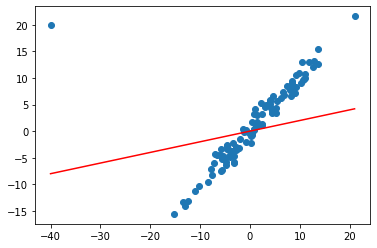

In [ ]:
w0, w1 = gradient_descent_back_cauchy(0, 0, p, c = 1 / 1000, verbose = True) 

plt.scatter(p[:,0], p[:,1])
plt.plot(x, w0*x + w1, 'r')

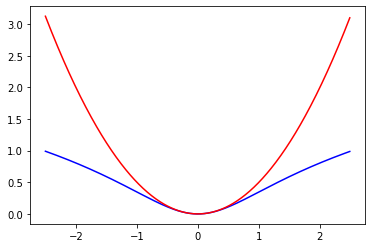

In [ ]:
x = np.arange(-2.5 , 2.5, 0.01)

def cauchy(c = 1, color = 'b'):
  cauchy = lambda u: c**2/2*np.log(1+(u/c)**2)
  plt.plot(x, cauchy(x), color)

cauchy(c = 1, color = 'b')
cauchy(c = 100, color = 'r')

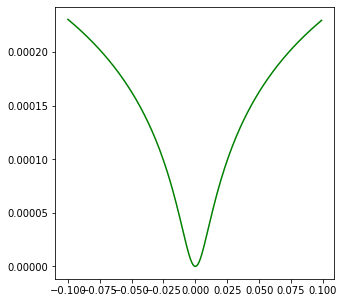

In [ ]:
plt.figure(figsize=(5,5))
x = np.arange(-0.1 , 0.1, 0.001)

cauchy(c = 1/100, color = 'g')

###### With c = 1/100 or 1/1000, the range that the function takes into account inliers is more narrow, therefore, the regression line is not robust as most of the points are considered as outliers. Conversely, with c = 100, the behaviour is like the least square error function, that let be influenced by outliers. The most robust value for c is 1, that has more range to consider as inliers. Commented in class with my favorite professor Lluis Garrido.

### 6. The Cauchy function is not “perfect”, it is not robust for any number of outliers. Using c = 1 and c = 1/100 you may, as before, gradually introduce more number of outliers into the dataset. You should see that for a certain number of outliers, the the Cauchy function will be sensitive to the “high” number of outliers. Can you comment on the experiments you have performed?

### c = 1

Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07


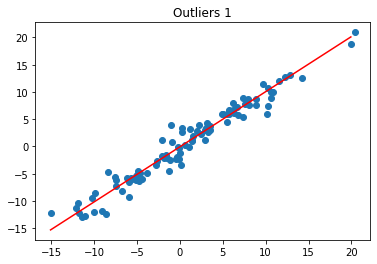

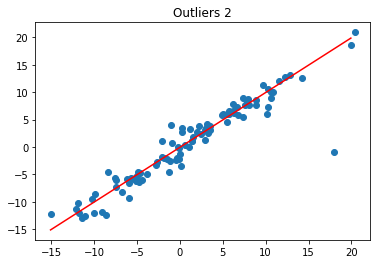

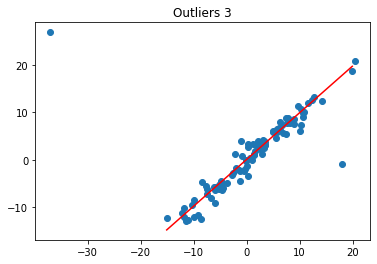

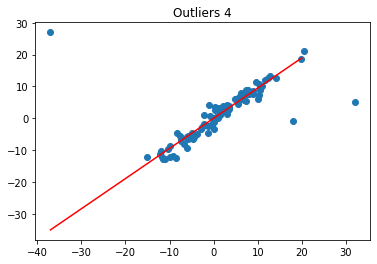

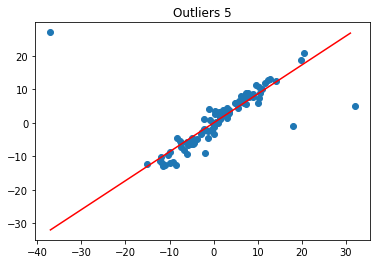

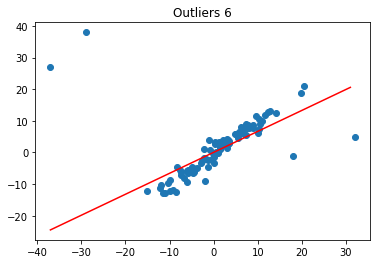

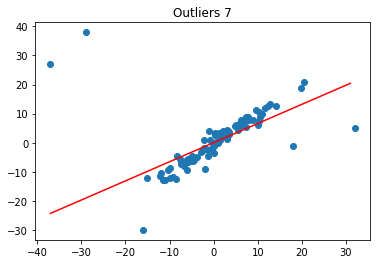

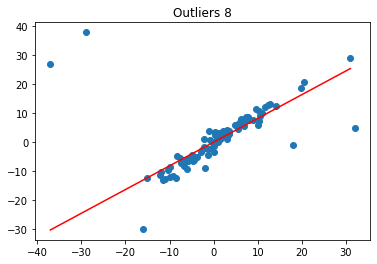

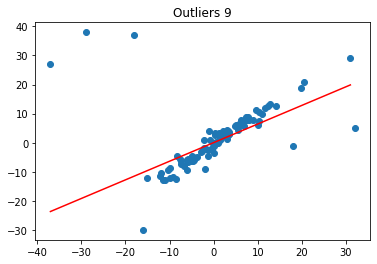

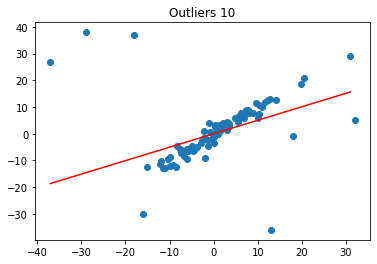

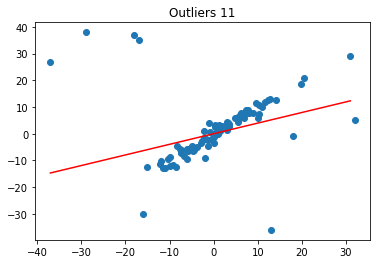

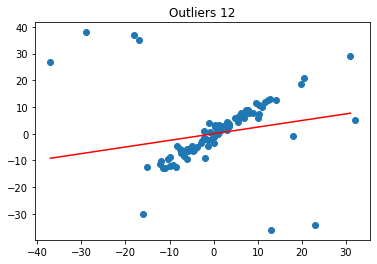

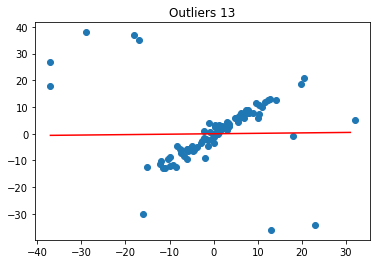

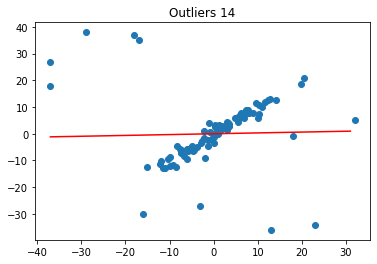

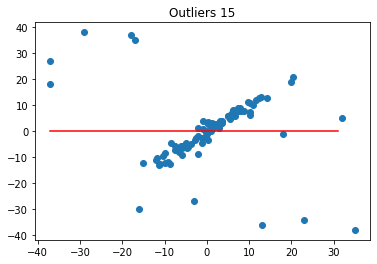

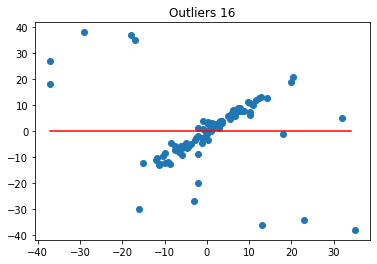

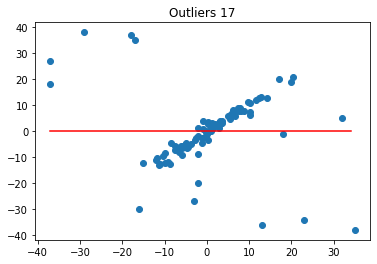

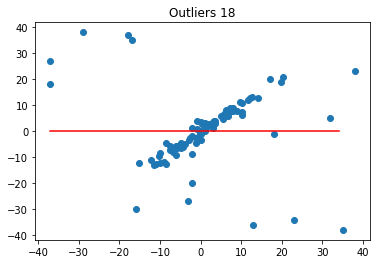

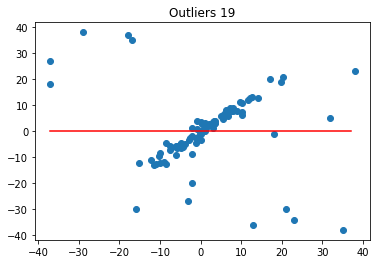

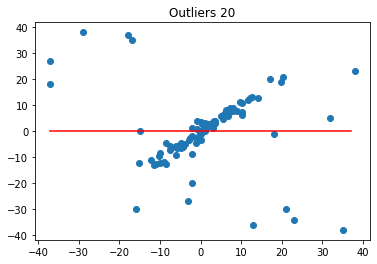

In [ ]:
p = np.random.multivariate_normal(m,s,100)
for i in range(20):
  x = np.arange(np.min(p[:,0]), np.max(p[:,0])) # range
  p[np.random.randint(0, 100)] = [np.random.randint(-40, 40), np.random.randint(-40, 40)]
  w0, w1 = gradient_descent_back_cauchy(0, 0, p, c = 1) 

  plt.figure()
  plt.title("Outliers "+str(i+1))
  plt.scatter(p[:,0], p[:,1])
  plt.plot(x, w0*x + w1, 'r')

### c = 1/100

Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07
Alpha value to low: 9.807971461541723e-07


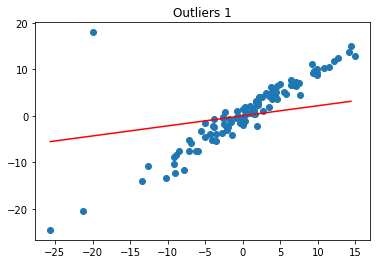

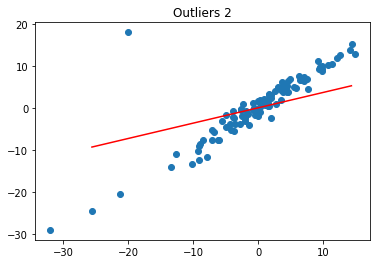

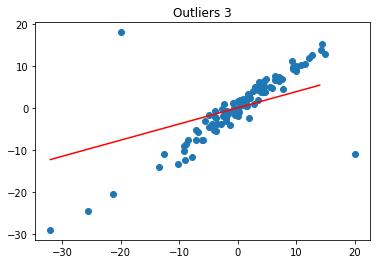

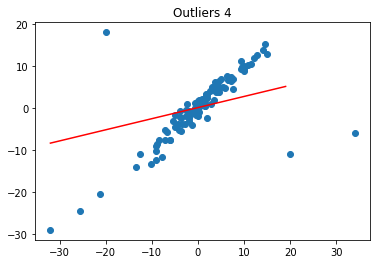

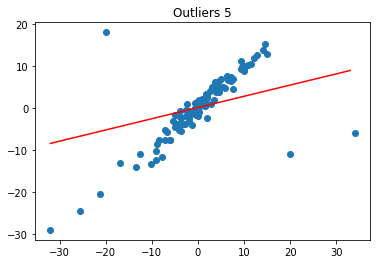

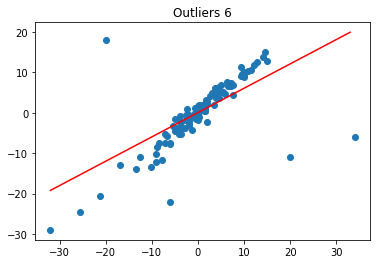

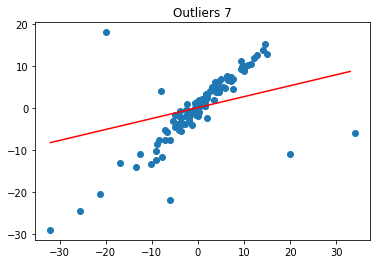

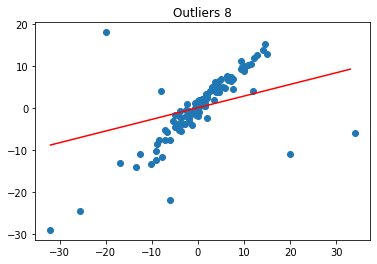

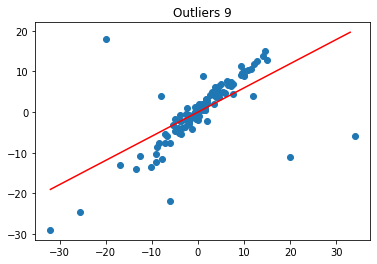

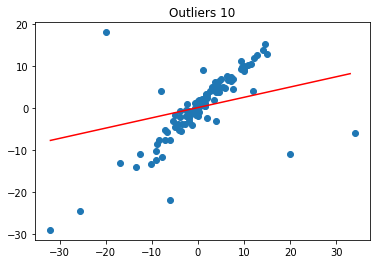

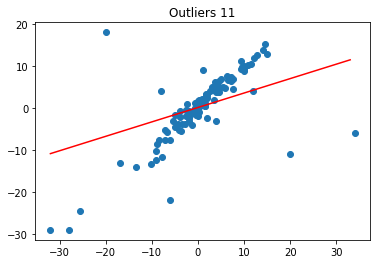

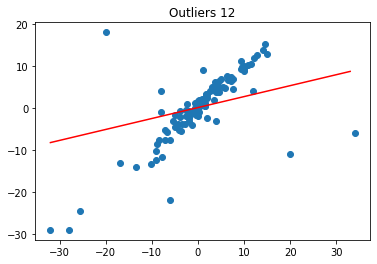

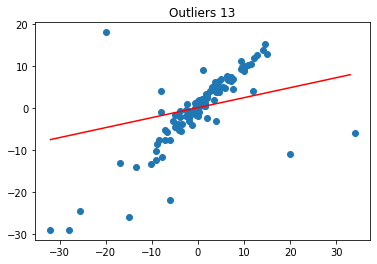

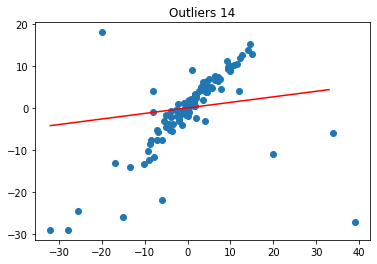

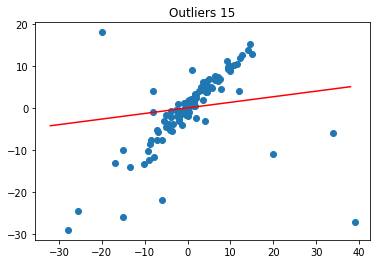

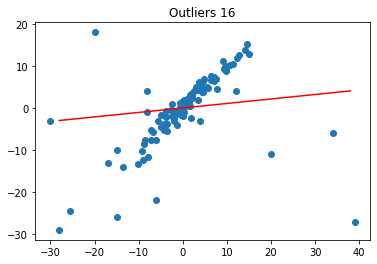

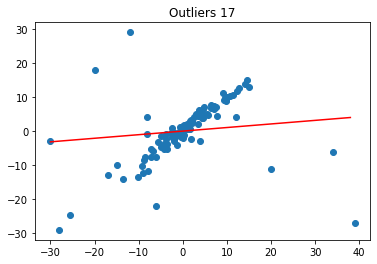

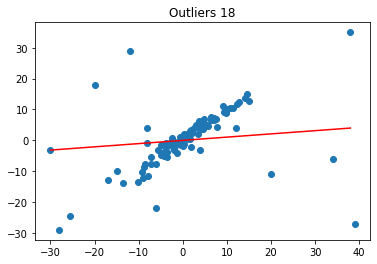

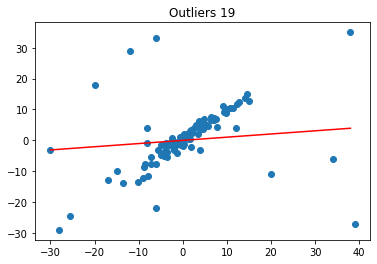

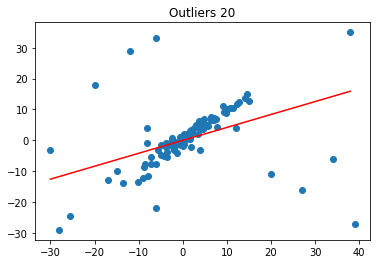

In [ ]:
p = np.random.multivariate_normal(m,s,100)
for i in range(20):
  x = np.arange(np.min(p[:,0]), np.max(p[:,0])) # range
  p[np.random.randint(0, 100)] = [np.random.randint(-40, 40), np.random.randint(-40, 40)]

  w0, w1 = gradient_descent_back_cauchy(0, 0, p, c = 1 / 100) 
  plt.figure()
  plt.title("Outliers "+str(i+1))
  plt.scatter(p[:,0], p[:,1])
  plt.plot(x, w0*x + w1, 'r')

###### We can observe at the experiments with c = 1, it is very robust with a lot of outliers, but the experiments with c = 1/100, it is very sensitive with more than 1 outlier because the function curve is more restrictive.